<a href="https://colab.research.google.com/github/VoHuynhDuyThanh/AI/blob/main/W5_FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
    pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=1019469cb02857d8e654bf6ef329526e0e432acba52a85efed30dd842e36443e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-15-34bdad2aecfc>:74: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-15-34bdad2aecfc>:75: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-15-34bdad2aecfc>:76: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


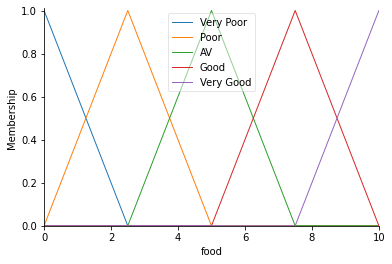

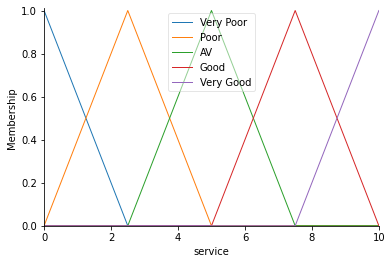

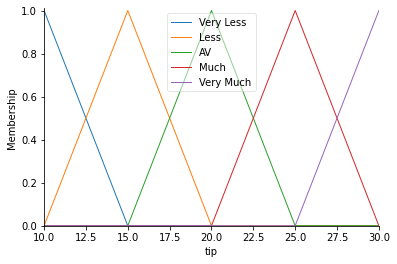

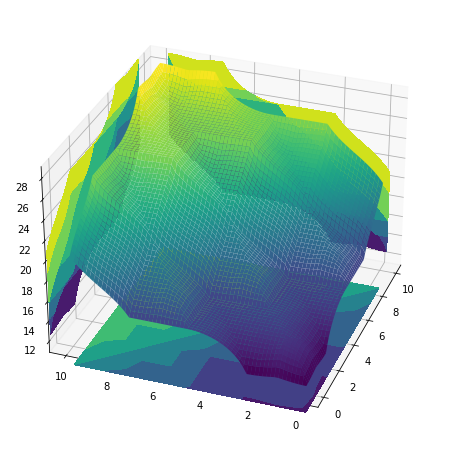

In [ ]:
#tip
from skfuzzy.control.controlsystem import Consequent
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

universe = np.linspace(0, 10, 61)     #tu dong ve membership
universe1 = np.linspace(10, 30, 61)

food = ctrl.Antecedent(universe, 'food')
service = ctrl.Antecedent(universe, 'service')
tip = ctrl.Consequent(universe1, 'tip')

names = ['Very Poor', 'Poor', 'AV', 'Good', 'Very Good']
names1 = ['Very Less', 'Less', 'AV', 'Much', 'Very Much']
food.automf(names = names)
service.automf(names = names)
tip.automf(names = names1)

food.view()
service.view()
tip.view()

rule0 = ctrl.Rule(antecedent = ((food['Very Poor'] & service['Very Poor'])| 
                                (food['Poor'] & service['Very Poor'])| 
                                (food['Very Poor'] & service['Poor'])), 
                                consequent = tip['Very Less'], label = 'Rule Very Poor')
#----------------------------------------------------------------------------------------------------------
rule1 = ctrl.Rule(antecedent = ((food['Very Poor'] & service['AV'])|
                                (food['Very Poor'] & service['Good'])|
                                (food['Good'] & service['Very Poor'])| 
                                (food['Poor'] & service['Poor'])| 
                                (food['Poor'] & service['AV'])|
                                (food['AV'] & service['Very Poor'])|
                                (food['AV'] & service['Poor'])), 
                                consequent = tip['Less'], label = 'Rule Poor')
#-----------------------------------------------------------------------------------------------------------
rule2 = ctrl.Rule(antecedent = ((food['Very Poor'] & service['Very Good'])| 
                                (food['Poor'] & service['Good'])| 
                                (food['AV'] & service['AV'])|
                                (food['Good'] & service['Poor'])|
                                (food['Very Good'] & service['Very Poor'])), 
                                consequent = tip['AV'], label = 'Rule AV')
#-----------------------------------------------------------------------------------------------------------
rule3 = ctrl.Rule(antecedent = ((food['Poor'] & service['Very Good'])| 
                                (food['AV'] & service['Good'])| 
                                (food['AV'] & service['Very Good'])|
                                (food['Good'] & service['AV'])|
                                (food['Good'] & service['Good'])|
                                (food['Very Good'] & service['Poor'])|
                                (food['Very Good'] & service['AV'])), 
                                consequent = tip['Much'], label = 'Rule Much')
#----------------------------------------------------------------------------------------------------------
rule4 = ctrl.Rule(antecedent = ((food['Good'] & service['Very Good'])| 
                                (food['Very Good'] & service['Good'])| 
                                (food['Very Good'] & service['Very Good'])), 
                                consequent = tip['Very Much'], label = 'Rule Very Good')
tipping_ctrl = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl, flush_after_run = 61 * 61 + 1)
upsampled = np.linspace(0, 10, 61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    tipping.input['food'] = x[i, j]
    tipping.input['service'] = y[i, j]
    tipping.compute()
    z[i, j] = tipping.output['tip']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30, 200)

<ipython-input-4-b88312fd0b3a>:76: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-4-b88312fd0b3a>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-4-b88312fd0b3a>:78: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


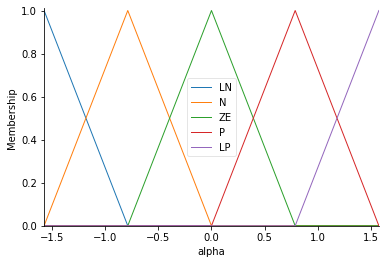

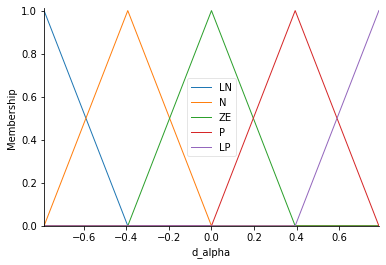

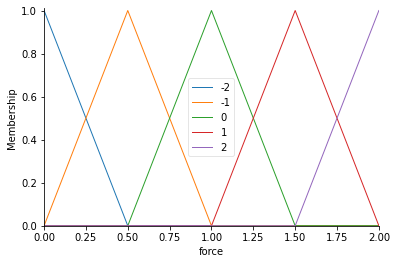

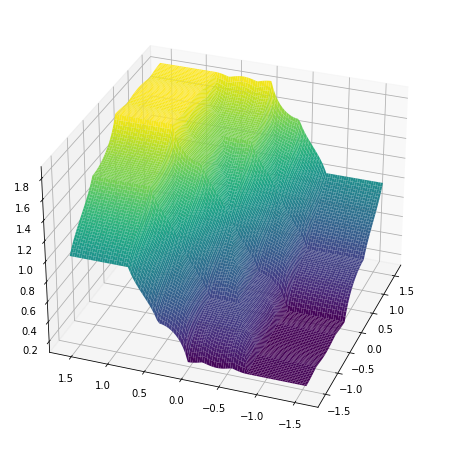

In [4]:
#con lắc ngược
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

universe = np.linspace(-(math.pi/2), math.pi/2, 101)
universe2 = np.linspace(-(math.pi/4), math.pi/4, 101)
universe1 = np.linspace(0, 2, 101)
alpha = ctrl.Antecedent(universe, 'alpha')
d_alpha = ctrl.Antecedent(universe2, 'd_alpha')
force = ctrl.Consequent(universe1, 'force')
names = ['LN', 'N', 'ZE', 'P', 'LP']
names_force = ['-2', '-1', '0', '1', '2']
alpha.automf(names = names)
d_alpha.automf(names = names)
force.automf(names = names_force)

alpha.view()
d_alpha.view()
force.view()

rule0 = ctrl.Rule(antecedent = ((alpha['LN'] & d_alpha['LN'])| 
                                (alpha['N'] & d_alpha['LN'])|
                                (alpha['ZE'] & d_alpha['LN'])|
                                (alpha['LN'] & d_alpha['ZE'])| 
                                (alpha['LN'] & d_alpha['N'])), 
                                consequent = force['-2'], label = 'Rule LN')
#----------------------------------------------------------------------------------------------------------
rule1 = ctrl.Rule(antecedent = ((alpha['LN'] & d_alpha['P'])|
                                (alpha['P'] & d_alpha['LN'])|
                                (alpha['N'] & d_alpha['N'])|
                                (alpha['N'] & d_alpha['ZE'])|
                                (alpha['ZE'] & d_alpha['N'])), 
                                consequent = force['-1'], label = 'Rule N')
#-----------------------------------------------------------------------------------------------------------
rule2 = ctrl.Rule(antecedent = ((alpha['LN'] & d_alpha['LP'])|
                                (alpha['N'] & d_alpha['P'])|
                                (alpha['ZE'] & d_alpha['ZE'])|
                                (alpha['P'] & d_alpha['N'])| 
                                (alpha['LP'] & d_alpha['LN'])), 
                                consequent = force['0'], label = 'Rule ZE')
#-----------------------------------------------------------------------------------------------------------
rule3 = ctrl.Rule(antecedent = ((alpha['N'] & d_alpha['LP'])|                             
                                (alpha['P'] & d_alpha['P'])|
                                (alpha['LP'] & d_alpha['N'])|
                                (alpha['ZE'] & d_alpha['P'])|
                                (alpha['P'] & d_alpha['ZE'])), 
                                consequent = force['1'], label = 'Rule P')
#----------------------------------------------------------------------------------------------------------
rule4 = ctrl.Rule(antecedent = ((alpha['P'] & d_alpha['LP'])| 
                                (alpha['LP'] & d_alpha['P'])|
                                (alpha['ZE'] & d_alpha['LP'])|
                                (alpha['LP'] & d_alpha['ZE'])|
                                (alpha['LP'] & d_alpha['LP'])),
                                consequent = force['2'], label = 'Rule LP')

forceping_ctrl = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
forceping = ctrl.ControlSystemSimulation(forceping_ctrl, flush_after_run = 101 * 101 + 1)
upsampled = np.linspace(-(math.pi/2), math.pi/2, 101)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(101):
  for j in range(101):
    forceping.input['alpha'] = x[i, j]
    forceping.input['d_alpha'] = y[i, j]
    forceping.compute()
    z[i, j] = forceping.output['force']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30, 200) 


<ipython-input-10-244f4028671d>:83: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-10-244f4028671d>:84: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-10-244f4028671d>:85: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


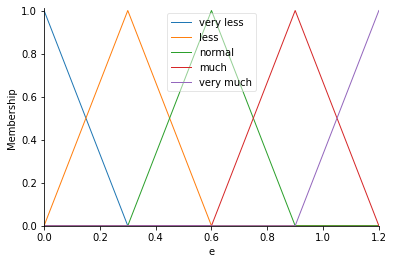

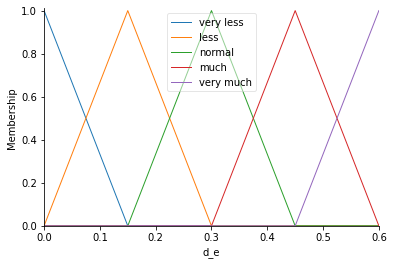

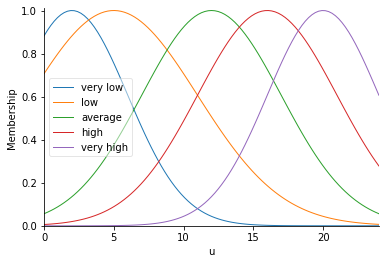

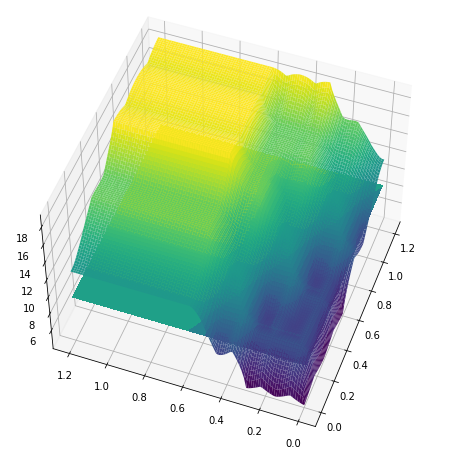

In [10]:
#con lắc ngược
#input (sai số e và đạo hàm sai số d_e), output (u)
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

universe = np.linspace(0, 1.2, 101) #sai số 5%
universe1 = np.linspace(0, 0.6, 101)
universe2 = np.linspace(0, 24, 101)
e = ctrl.Antecedent(universe, 'e')
d_e = ctrl.Antecedent(universe1, 'd_e')
u = ctrl.Consequent(universe2, 'u')
names = ['very less', 'less', 'normal', 'much', 'very much']
names_u = ['very low', 'low', 'average', 'high', 'very high']
e.automf(names = names)
d_e.automf(names = names)
           
u['very low'] = fuzz.gaussmf(u.universe,2,4)
u['low'] = fuzz.gaussmf(u.universe,5,6)
u['average'] = fuzz.gaussmf(u.universe,12,5)
u['high'] = fuzz.gaussmf(u.universe,16,5)
u['very high'] = fuzz.gaussmf(u.universe,20,4)


e.view()
d_e.view()
u.view()

rule0 = ctrl.Rule(antecedent = ((e['very less'] & d_e['very less'])| 
                                (e['less'] & d_e['very less'])|
                                (e['normal'] & d_e['very less'])|
                                (e['very less'] & d_e['normal'])| 
                                (e['very less'] & d_e['less'])), 
                                consequent = u['very low'], label = 'Rule very low')
#----------------------------------------------------------------------------------------------------------
rule1 = ctrl.Rule(antecedent = ((e['very less'] & d_e['much'])|
                                (e['much'] & d_e['very less'])|
                                (e['less'] & d_e['less'])|
                                (e['less'] & d_e['normal'])|
                                (e['normal'] & d_e['less'])), 
                                consequent = u['low'], label = 'Rule low')
#-----------------------------------------------------------------------------------------------------------
rule2 = ctrl.Rule(antecedent = ((e['very less'] & d_e['very much'])|
                                (e['less'] & d_e['much'])|
                                (e['normal'] & d_e['normal'])|
                                (e['much'] & d_e['less'])| 
                                (e['very much'] & d_e['very less'])), 
                                consequent = u['average'], label = 'Rule average')
#-----------------------------------------------------------------------------------------------------------
rule3 = ctrl.Rule(antecedent = ((e['less'] & d_e['very much'])|                             
                                (e['much'] & d_e['much'])|
                                (e['very much'] & d_e['less'])|
                                (e['normal'] & d_e['much'])|
                                (e['much'] & d_e['normal'])), 
                                consequent = u['high'], label = 'Rule high')
#----------------------------------------------------------------------------------------------------------
rule4 = ctrl.Rule(antecedent = ((e['much'] & d_e['very much'])| 
                                (e['very much'] & d_e['much'])|
                                (e['normal'] & d_e['very much'])|
                                (e['very much'] & d_e['normal'])|
                                (e['very much'] & d_e['very much'])),
                                consequent = u['very high'], label = 'Rule very high')

uping_ctrl = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4])
uping = ctrl.ControlSystemSimulation(uping_ctrl, flush_after_run = 101 * 101 + 1)
upsampled = np.linspace(0, 1.2, 101)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(101):
  for j in range(101):
    uping.input['e'] = x[i, j]
    uping.input['d_e'] = y[i, j]
    uping.compute()
    z[i, j] = uping.output['u']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(50, 200)